In [1]:
from util.sampling import dollar_bars, dollar_bars_v2
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler, StandardScaler

from label import triple_barrier as tb
import ta
from util import getTA
import sys
import os

# current_dir = os.path.dirname(os.path.abspath(__file__))
# # 计算项目根目录（dir_b的上一级目录）
# project_root = os.path.abspath(os.path.join(current_dir, ".."))
# # 将项目根目录添加到Python搜索路径
# sys.path.append(project_root)


# lib
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy.stats import norm, moment

#feature
from sklearn import preprocessing
from sklearn.decomposition import PCA 
#ML
# import autogluon as ag


# deep learning
import keras

# Technical analysis
import ta
from util import getTA #local
from util import tautil #local

In [3]:
df = pd.read_csv('/Volumes/Ext-Disk/data/futures/um/daily/trades/ETHUSDT/ETHUSDT-trades-2025-06-24.zip')
df.head()

,id,price,qty,quote_qty,time,is_buyer_maker
0,5871327180,2410.4,0.888,2140.4352,1750723200022,False
1,5871327181,2410.4,0.305,735.1720,1750723200022,False
2,5871327182,2410.4,0.509,1226.8936,1750723200022,False
3,5871327183,2410.4,0.015,36.1560,1750723200022,False
4,5871327184,2410.4,0.039,94.0056,1750723200022,False


In [2]:
# df = pd.read_csv('/Volumes/Ext-Disk/data/futures/um/daily/trades/ETHUSDT/ETHUSDT-trades-2025-06-24.zip')
df = pd.read_csv('/Volumes/Ext-Disk/data/futures/um/monthly/trades/ETHUSDT/ETHUSDT-trades-2025-05.zip')

df['time'] = pd.to_datetime(df['time'], unit= 'ms')
# print(df.head(100))

group_dollar_bar_df = dollar_bars_v2(df, bar_size=10000 * 9000)

print(group_dollar_bar_df.head(100))



                               qty  quote_qty_sum     open    close     high  \
time                                                                           
2025-05-01 00:00:00.033  25057.862   4.497929e+07  1792.71  1797.44  1798.15   
2025-05-01 00:12:24.742  50152.981   9.001853e+07  1797.43  1796.28  1797.64   
2025-05-01 00:55:03.030  49953.489   8.999370e+07  1796.28  1802.70  1806.27   
2025-05-01 01:10:26.853  49916.931   9.000830e+07  1802.70  1801.89  1806.01   
2025-05-01 01:40:11.820  49869.481   8.999551e+07  1801.89  1808.50  1810.00   
...                            ...            ...      ...      ...      ...   
2025-05-01 17:52:00.021  48548.979   8.997169e+07  1853.41  1850.81  1855.47   
2025-05-01 18:13:35.973  48680.920   9.002799e+07  1850.81  1853.33  1853.33   
2025-05-01 18:34:09.436  48526.161   8.997410e+07  1853.33  1853.25  1857.82   
2025-05-01 18:52:22.405  48642.264   9.002262e+07  1853.24  1846.38  1855.69   
2025-05-01 19:16:43.471  48673.152   8.9

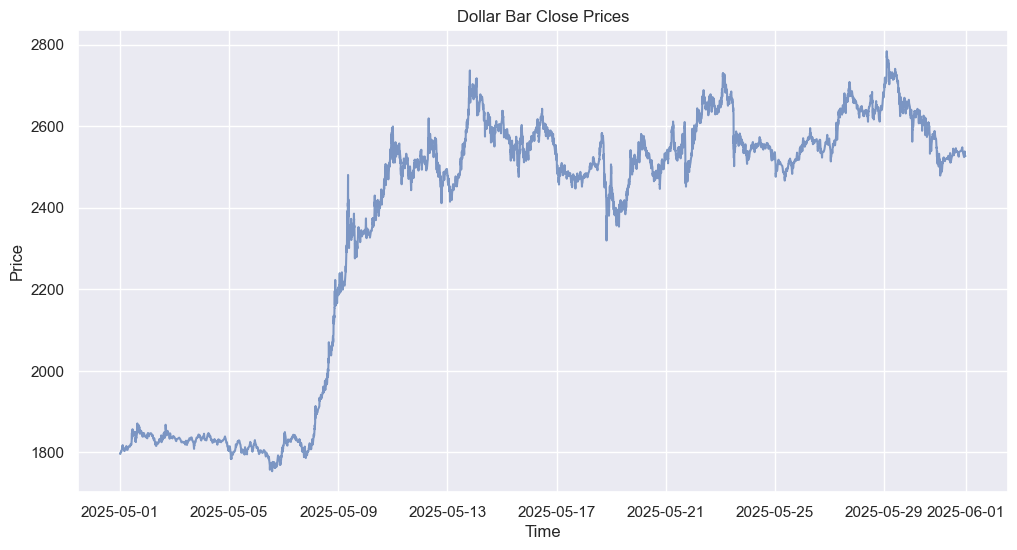

In [3]:
# 绘制两条线
plt.figure(figsize=(12,6))
# plt.plot(df.index, df.close, label='Original Close', alpha=0.7)
plt.plot(group_dollar_bar_df.index, group_dollar_bar_df.close, label='Dollar Bar Close', alpha=0.7)


plt.title('Dollar Bar Close Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show() # 确保图形显示


In [12]:
# group_dollar_bar_df.close
# print('get_rsi_{}'.format(group_dollar_bar_df.close.values))

get_rsi_[2411.02 2411.84 2406.36 2403.73 2401.64 2403.89 2397.23 2399.89 2399.03
 2405.05 2412.3  2404.85 2411.35 2410.51 2396.4  2389.99 2400.   2391.69
 2396.01 2391.24 2391.   2394.6  2401.53 2401.   2395.64 2397.53 2397.14
 2403.35 2402.98 2405.17 2411.53 2418.08 2418.52 2418.71 2417.8  2413.9
 2420.99 2423.95 2429.38 2426.34 2420.17 2417.24 2419.07 2406.67 2402.76
 2401.11 2396.42 2399.75 2401.   2392.04 2392.24 2386.45 2384.6  2388.76
 2384.5  2379.63 2375.44 2389.   2395.15 2402.44 2398.57 2403.   2410.11
 2396.83 2401.33 2401.44 2399.12 2407.73 2418.63 2422.69 2445.84 2436.28
 2433.2  2424.86 2418.67 2414.65 2414.52 2412.54 2422.   2406.57 2416.29
 2407.83 2413.25 2410.31 2398.81 2403.57 2414.66 2414.28 2405.   2408.98
 2415.05 2407.   2404.74 2417.36 2410.22 2414.28 2420.72 2414.87 2415.97
 2406.42 2420.39 2427.54 2425.7  2421.37 2422.33 2412.81 2423.83 2432.85
 2421.54 2431.59 2435.21 2433.8  2431.04 2434.05 2433.63 2427.89 2435.6
 2444.   2439.6  2430.86 2436.11 2435.46 2427

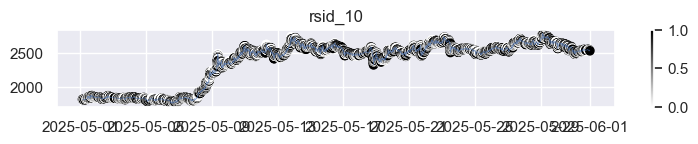

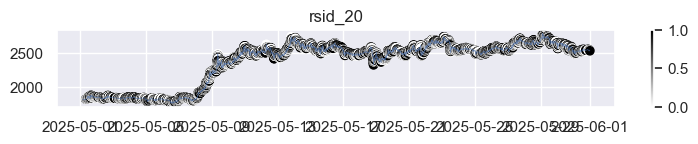

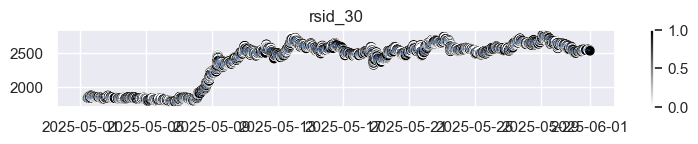

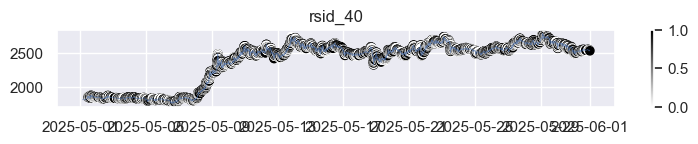

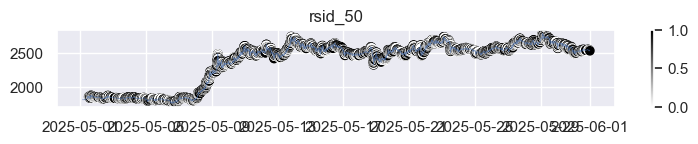

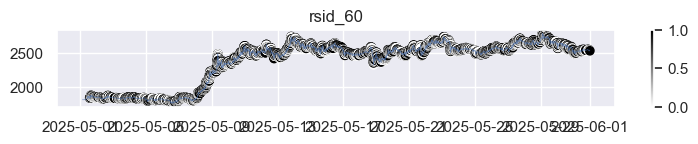

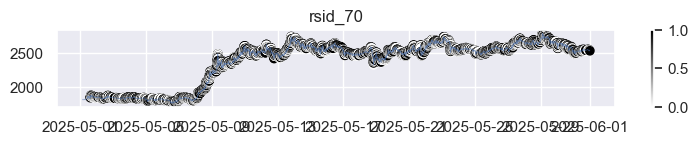

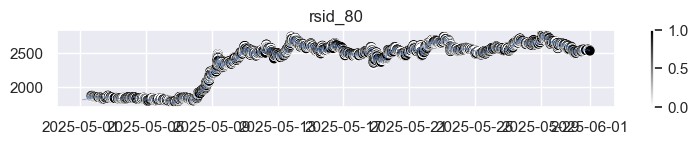

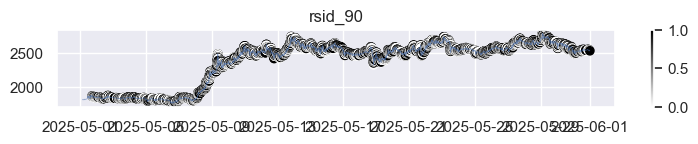

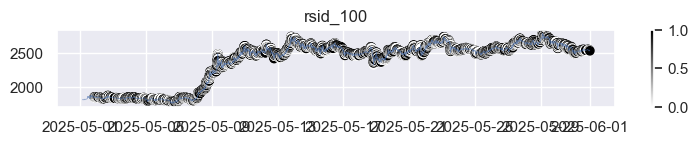

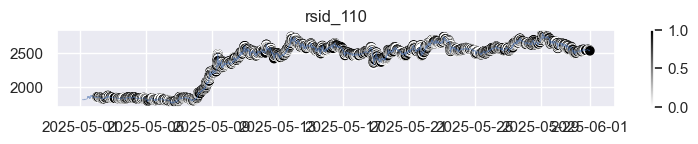

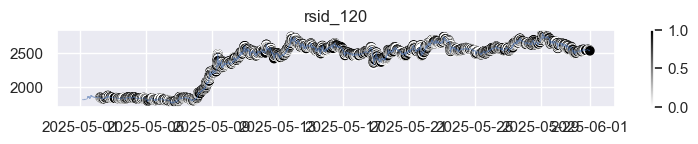

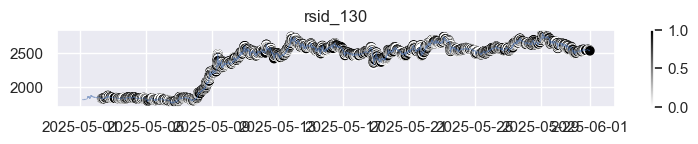

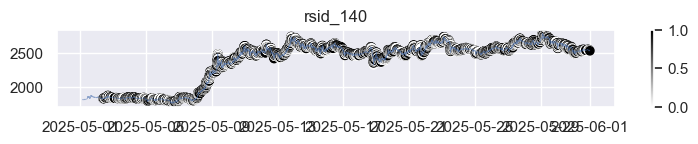

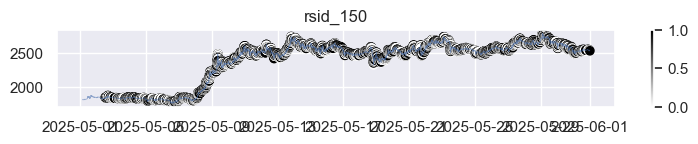

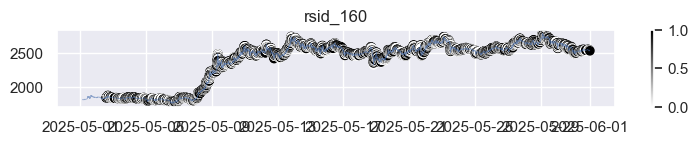

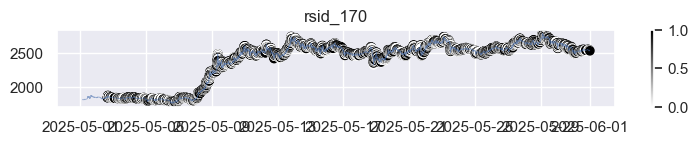

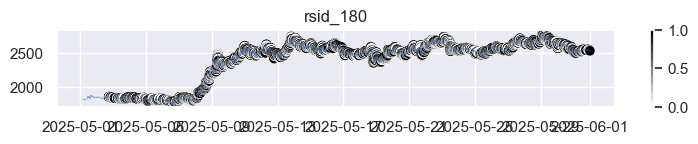

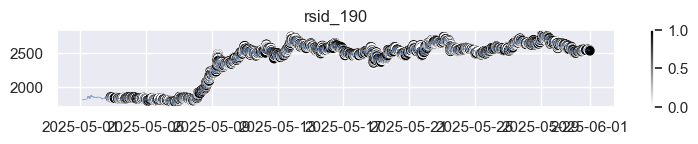

In [4]:


windows = np.arange(10,200,10)
rsi_df = pd.DataFrame(index=df.index)
# rsi_df = tautil.get_rsi(group_dollar_bar_df.close, windows)

rsi_df = tautil.get_rsi_decision(group_dollar_bar_df.close, windows)


for i in rsi_df.columns:
    sc = rsi_df[i].copy()
    plt.figure(figsize=(9,1))
    plt.plot(group_dollar_bar_df.close.loc[sc.index], linewidth=0.5,alpha=0.6)
    plt.scatter(group_dollar_bar_df.close.loc[sc.index].index, group_dollar_bar_df.close.loc[sc.index], c=sc,cmap='gray_r', alpha=1, vmin=0,vmax=1)
    plt.colorbar()
    plt.title('{}'.format(i))
    plt.show()


In [6]:
rsi_w = 'rsid_100'
long = rsi_df.loc[rsi_df[rsi_w]==1,rsi_w]

In [11]:
long

time
2025-05-01 20:02:32.381    1.0
2025-05-01 21:01:32.199    1.0
2025-05-01 23:00:01.151    1.0
2025-05-02 00:17:39.371    1.0
2025-05-02 00:40:10.790    1.0
                          ... 
2025-05-31 19:11:16.498    1.0
2025-05-31 20:07:36.201    1.0
2025-05-31 20:59:45.621    1.0
2025-05-31 23:04:38.107    1.0
2025-05-31 23:47:33.358    1.0
Name: rsid_100, Length: 2804, dtype: float64

In [12]:
len(rsi_df)

5571

In [13]:

enter = long.index
pt_sl = [0.2,0.2] # profit-taking, stop-loss target
max_holding = [5,0] #[day,hours]
barrier = tb.get_barrier(group_dollar_bar_df.close,enter,pt_sl,max_holding=max_holding,target=None)

In [14]:
barrier

,exit,price,ret,side
time,,,,
2025-05-01 20:02:32.381,2025-05-06 20:04:49.507,1847.13,-0.035083,1.0
2025-05-01 21:01:32.199,2025-05-06 21:12:51.225,1847.59,-0.042756,1.0
2025-05-01 23:00:01.151,2025-05-06 23:02:02.779,1838.42,-0.020276,1.0
2025-05-02 00:17:39.371,2025-05-07 00:21:06.043,1845.90,-0.007837,1.0
2025-05-02 00:40:10.790,2025-05-07 00:41:42.248,1847.61,-0.004318,1.0
...,...,...,...,...
2025-05-31 19:11:16.498,NaT,2538.98,0.000000,1.0
2025-05-31 20:07:36.201,NaT,2540.58,0.000000,1.0
2025-05-31 20:59:45.621,NaT,2548.60,0.000000,1.0


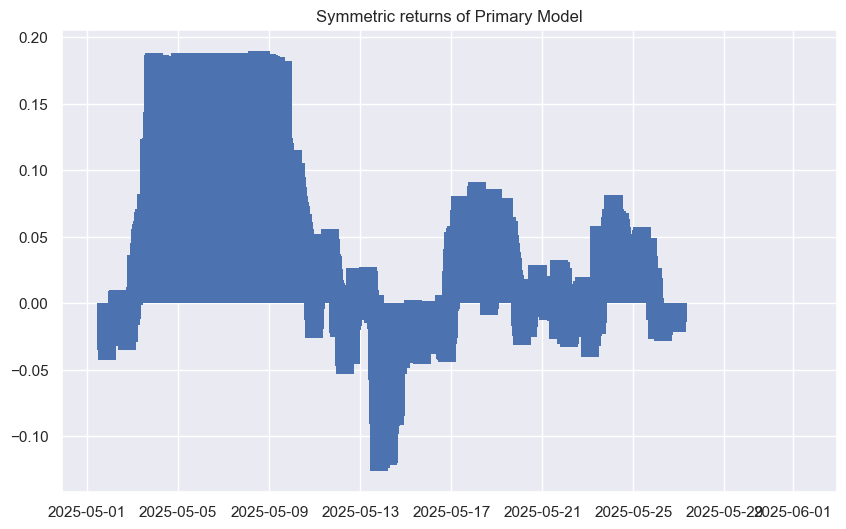

In [15]:
ret = barrier.ret
plt.figure(figsize=(10,6))
plt.title('Symmetric returns of Primary Model')
plt.bar(ret.index, ret.dropna(),linewidth=0)
plt.savefig('image/returns_of_1stmodel.jpg')
plt.show();

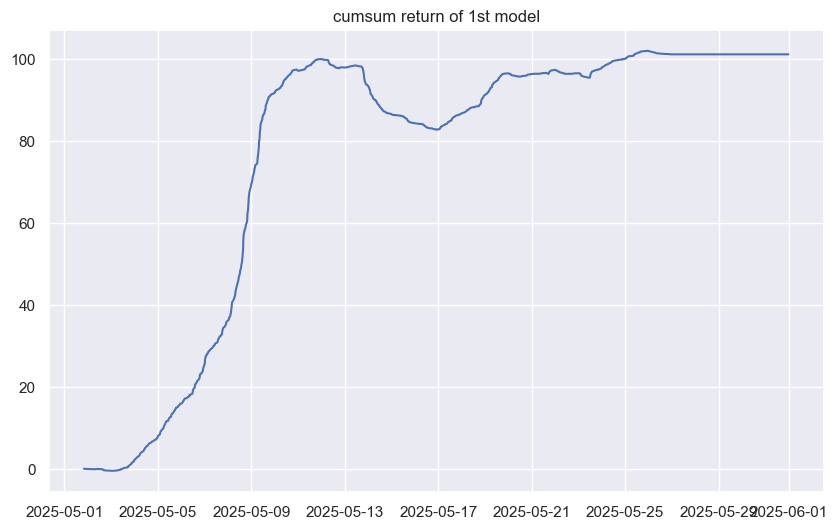

In [17]:
plt.figure(figsize=(10,6))
plt.title('cumsum return of 1st model')
plt.savefig('image/cumsum_return_1stmodel.jpg')
plt.plot(ret.cumsum())
plt.show()

In [18]:
long

time
2025-05-01 20:02:32.381    1.0
2025-05-01 21:01:32.199    1.0
2025-05-01 23:00:01.151    1.0
2025-05-02 00:17:39.371    1.0
2025-05-02 00:40:10.790    1.0
                          ... 
2025-05-31 19:11:16.498    1.0
2025-05-31 20:07:36.201    1.0
2025-05-31 20:59:45.621    1.0
2025-05-31 23:04:38.107    1.0
2025-05-31 23:47:33.358    1.0
Name: rsid_100, Length: 2804, dtype: float64

In [19]:
barrier

,exit,price,ret,side
time,,,,
2025-05-01 20:02:32.381,2025-05-06 20:04:49.507,1847.13,-0.035083,1.0
2025-05-01 21:01:32.199,2025-05-06 21:12:51.225,1847.59,-0.042756,1.0
2025-05-01 23:00:01.151,2025-05-06 23:02:02.779,1838.42,-0.020276,1.0
2025-05-02 00:17:39.371,2025-05-07 00:21:06.043,1845.90,-0.007837,1.0
2025-05-02 00:40:10.790,2025-05-07 00:41:42.248,1847.61,-0.004318,1.0
...,...,...,...,...
2025-05-31 19:11:16.498,NaT,2538.98,0.000000,1.0
2025-05-31 20:07:36.201,NaT,2540.58,0.000000,1.0
2025-05-31 20:59:45.621,NaT,2548.60,0.000000,1.0


In [20]:
first_model = pd.DataFrame()
first_model['y_pred'] = long
first_model['y_true'] = np.sign(long*barrier.ret)
first_model = first_model.dropna()

y_pred1 = first_model.y_pred
y_true1 = first_model.y_true

In [21]:
y_true1

time
2025-05-01 20:02:32.381   -1.0
2025-05-01 21:01:32.199   -1.0
2025-05-01 23:00:01.151   -1.0
2025-05-02 00:17:39.371   -1.0
2025-05-02 00:40:10.790   -1.0
                          ... 
2025-05-31 19:11:16.498    0.0
2025-05-31 20:07:36.201    0.0
2025-05-31 20:59:45.621    0.0
2025-05-31 23:04:38.107    0.0
2025-05-31 23:47:33.358    0.0
Name: y_true, Length: 2804, dtype: float64

In [22]:
def figure_scatter(sc,close, title, cmap='bwr', figsize=(15,5)):
    plt.figure(figsize=figsize)
    plt.plot(close, linewidth=0.5,alpha=0.6)
    plt.scatter(close.loc[sc.index].index, close.loc[sc.index], c=sc,cmap=cmap, alpha=1)
    plt.colorbar()
    plt.title(title)
    plt.savefig('image/{}.png'.format(title))
    plt.show()

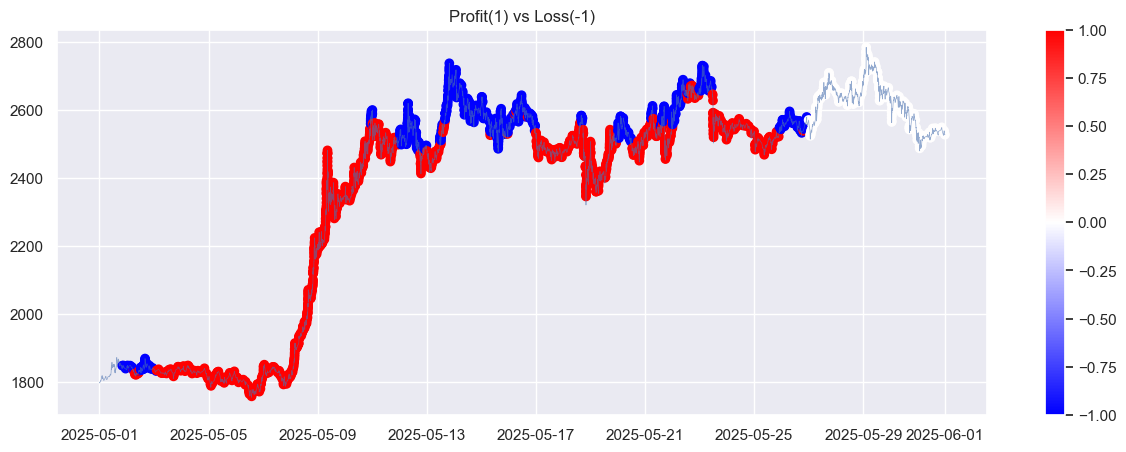

In [24]:
sc = y_true1
title = 'Profit(1) vs Loss(-1)'
figure_scatter(sc, group_dollar_bar_df.close, title, cmap='bwr', figsize=(15,5))

In [25]:
pnllabel = y_true1.loc[y_true1!=0]
pnllabel.value_counts()

y_true
 1.0    1536
-1.0     824
Name: count, dtype: int64

In [26]:
print('Probability of winning: ',pnllabel.value_counts().values[0] / pnllabel.value_counts().values.sum())

Probability of winning:  0.6508474576271186


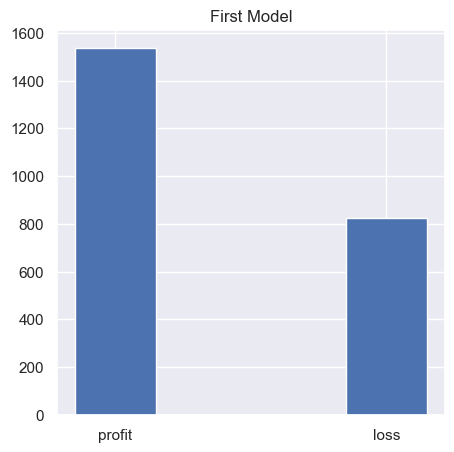

In [27]:
plt.figure(figsize=(5,5))
plt.bar(['profit','loss'],pnllabel.value_counts(), width=0.3)
plt.title('First Model')
plt.savefig('image/pnl_first_model.jpg')
plt.show()